***

## Introduction

We are provided with some information with the data set from Kaggle:   

### Context

In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

### Content

Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. Personal/identifying data has been removed. This dataset is a single .csv with the following fields.

**bite_date**: The date the bite occurred  
**SpeciesIDDesc**: The species of animal that did the biting  
**BreedIDDesc**: Breed (if known)  
**GenderIDDesc**: Gender (of the animal)  
**color**: color of the animal  
**vaccination_yrs**: how many years had passed since the last vaccination  
**vaccination_date**: the date of the last vaccination  
**victim_zip**: the zipcode of the victim  
**AdvIssuedYNDesc**: whether advice was issued  
**WhereBittenIDDesc**: Where on the body the victim was bitten  
**quarantine_date**: whether the animal was quarantined  
**DispositionIDDesc**: whether the animal was released from quarantine  
**head_sent_date**: the date the animal’s head was sent to the lab  
**release_date**: the date the animal was released  
**ResultsIDDesc**: results from lab tests (for rabies)  


***

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('Health_AnimalBites.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB
None


In [3]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
             bite_date SpeciesIDDesc BreedIDDesc GenderIDDesc       color  \
0  1985-05-05 00:00:00           DOG         NaN       FEMALE  LIG. BROWN   
1  1986-02-12 00:00:00           DOG         NaN      UNKNOWN   BRO & BLA   
2  1987-05-07 00:00:00           DOG         NaN      UNKNOWN         NaN   
3  1988-10-02 00:00:00           DOG         NaN         MALE   BLA & BRO   
4  1989-08-29 00:00:00           DOG         NaN       FEMALE     BLK-WHT   

   vaccination_yrs     vaccination_date victim_zip AdvIssuedYNDesc  \
0              1.0  1985-06-20 00:00:00      40229              NO   
1              NaN                  NaN      40218              NO   
2              NaN                  NaN      40219              NO   
3              NaN                  NaN        NaN              NO   
4              NaN                  NaN        NaN              NO   

  WhereBittenIDDesc      quarantine_date DispositionIDDesc head_sent_date  \
0      

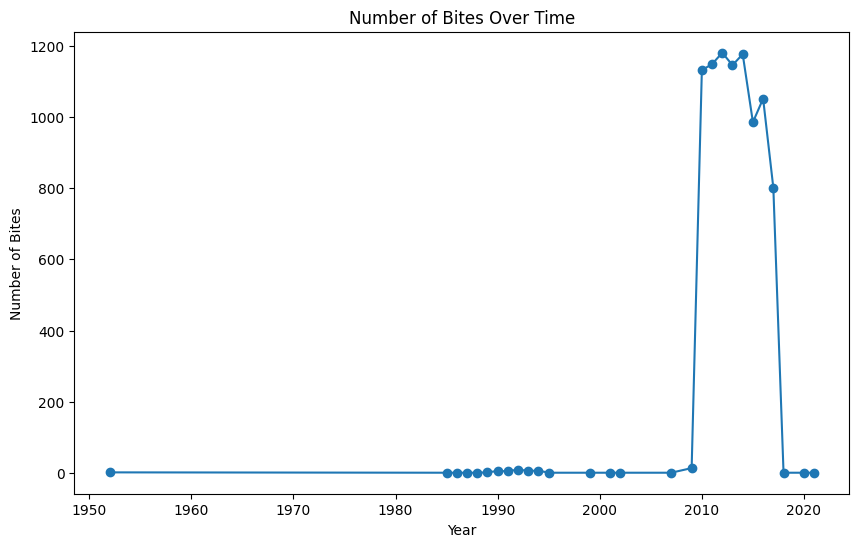

In [4]:
# Explore trends over timewith line plot of a time series column
# Filter out invalid dates
data = data[pd.to_datetime(data['bite_date'], errors='coerce').notnull()]

# Convert to datetime format
data['bite_date'] = pd.to_datetime(data['bite_date'])

# Extract year
data['year'] = data['bite_date'].dt.year

# Filter years less than 2030
data_filtered = data[data['year'] < 2030]

# Plot the line plot
plt.figure(figsize=(10, 6))
data_filtered['year'].value_counts().sort_index().plot(marker='o')
plt.title('Number of Bites Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Bites')
plt.show()

### The line plot shows that number of bites has increased around 2010. 
1. It could be possible that earlier the number of animal bites were not recorded properly and therefore, the number of bites earlier appear very low. 
2. On the other hand, it could also mean that number of animal bites indeed increased since 2010 due to some external factors (e.g. number of stray animals picked up since 2010, animal shelter program changes etc.)

### It would be interesting to check how the number of bites are distributed across different animals 

Bites by Species
DOG        6931
CAT        1535
BAT          76
RACCOON      21
OTHER         8
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64


<AxesSubplot: title={'center': 'Number of people bitten by animal'}>

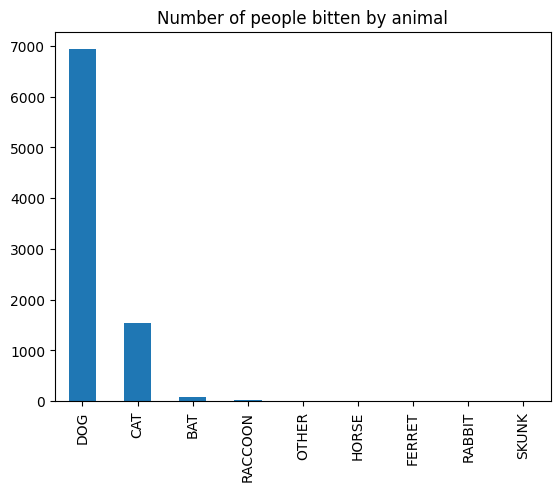

In [5]:
# Which animal bites are common? Count number of bites by different animals 
print("Bites by Species")
print(data["SpeciesIDDesc"].value_counts())
data["SpeciesIDDesc"].value_counts().plot(kind="bar", title="Number of people bitten by animal")

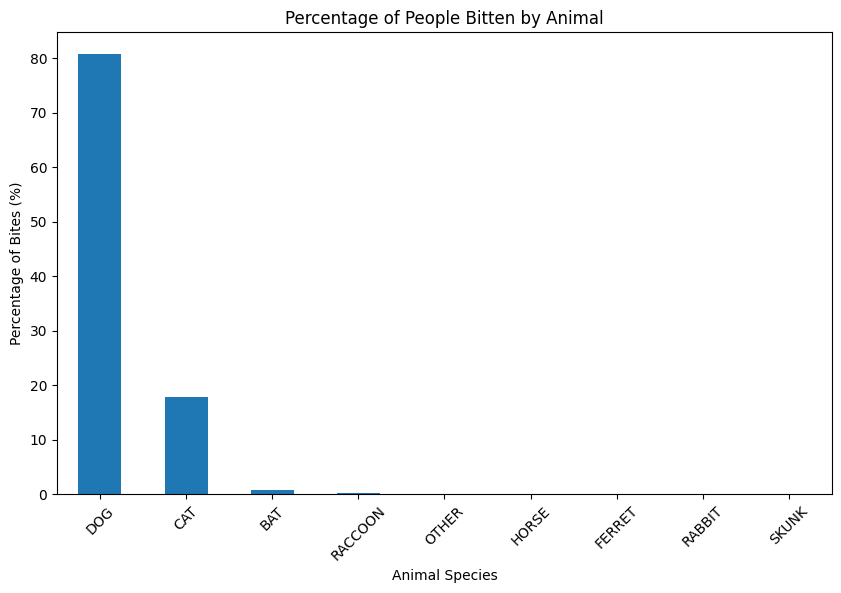

In [6]:
# Count number of bites by different animals
species_counts = data["SpeciesIDDesc"].value_counts()

# Calculate percentage of bites for each animal species
species_percentage = (species_counts / species_counts.sum()) * 100

# Plotting the percentage of bites for each animal species
plt.figure(figsize=(10, 6))
species_percentage.plot(kind="bar", title="Percentage of People Bitten by Animal")
plt.xlabel("Animal Species")
plt.ylabel("Percentage of Bites (%)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### The above plot shows dog bites are most common followed by cat bites. The # of dog bites is approximately 5x the # of cat bites. In addition, approximately 80% of bites correspond to dogs from this dataset representing dog bites in the city as the major problem. 

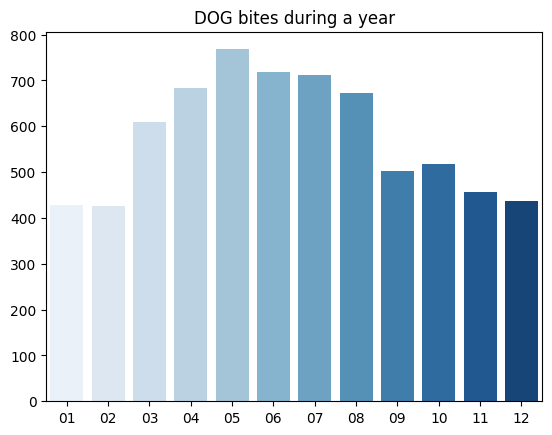

In [7]:
## Visualization of monthly distribution of animal bites

def animal_month(animal, data):
    month_list= ['01','02','03','04','05','06','07','08','09','10','11','12']
    numberOfAnimal = []
    for i in month_list:
        x = data.loc[(data['SpeciesIDDesc'] == animal) & (data['bite_date'].dt.strftime('%m') == i)]
        numberOfAnimal.append(len(x))
    ax = sns.barplot(x=month_list, y=numberOfAnimal, palette="Blues")  
    plt.title(animal + ' bites during a year')

animal_month('DOG', data)
plt.show()

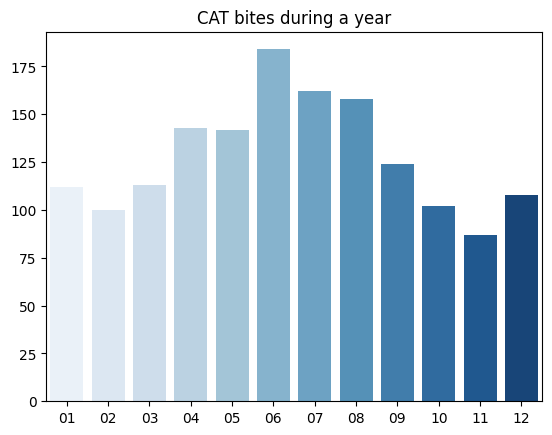

In [8]:
animal_month('CAT', data)
plt.show()

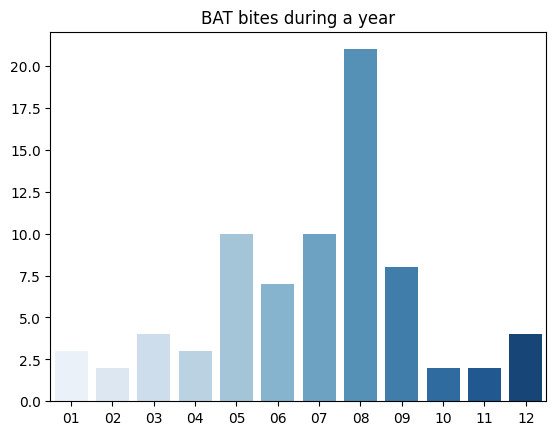

In [9]:
animal_month('BAT', data)
plt.show()

### Based on the monthly breakdown, it seems the dog bites appear higher during summer months from April to August. Why this could be the case?  

1. Number of stray dogs increase during the summer season 
2. Dogs (stray or pets) tend to spend more time outside during summer season 

Index(['PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETRIV', 'BOXER', 'CHICHAUHUA',
       'SHIH TZU', 'BEAGLE', 'ROTTWEILER', 'AAUST. TERR.', 'DACHSHUND'],
      dtype='object')


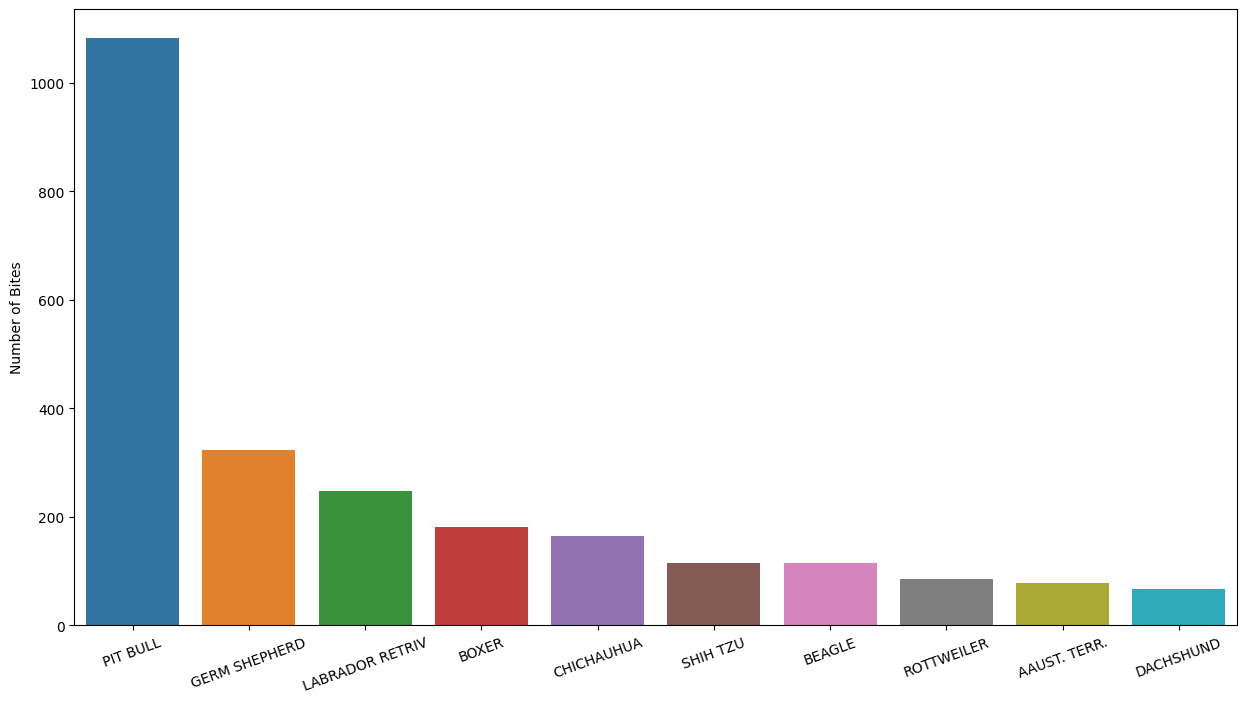

In [10]:
## Most Aggressive 10 Species for animal bites
count = data.BreedIDDesc.value_counts()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10])
plt.xticks(rotation=20)
plt.ylabel("Number of Bites")

print(count[0:10].index)

### Based on the # of bites breakdown with different species of animals, it seems Pit Bull category clearly stands out. This could mean that Pit Bull dogs are more dangerous for biting issue or in general the city has more Pit Bull dogs than other breeds and therefore, this category stands out.  

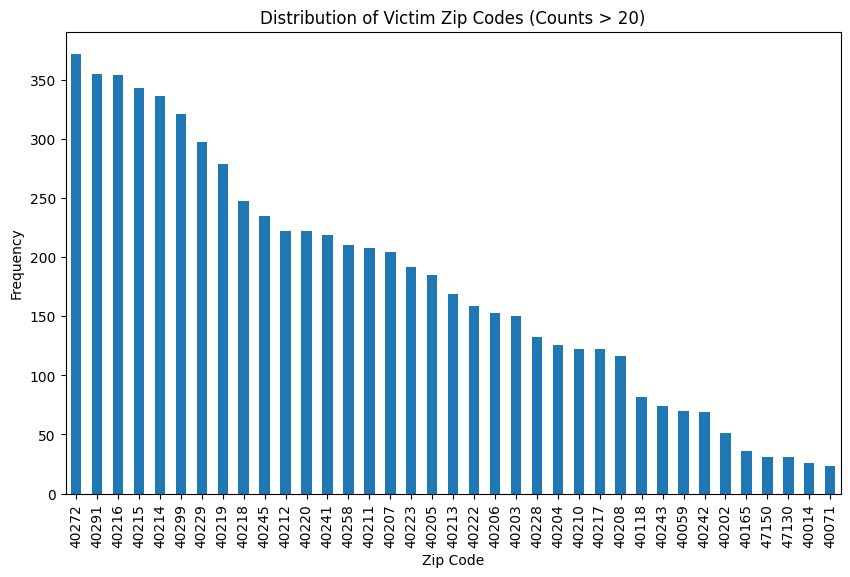

In [11]:
# Explore data distribution with Histogram of victim zip codes
# Filter zip codes with counts greater than 20
zip_counts = data['victim_zip'].value_counts()
zip_counts_filtered = zip_counts[zip_counts > 20]

# Plot histogram for filtered zip codes
plt.figure(figsize=(10, 6))
zip_counts_filtered.plot(kind='bar')
plt.title('Distribution of Victim Zip Codes (Counts > 20)')
plt.xlabel('Zip Code')
plt.ylabel('Frequency')
plt.show()

### The zipcode data is necessary to understand the neighbourhood where the animal bites seem to show the highest impact. Based on these data, we might need to open more animal shelter centers and/or open more veterinary hospitals to take care of animal wellcare in that area to improve their behavior.

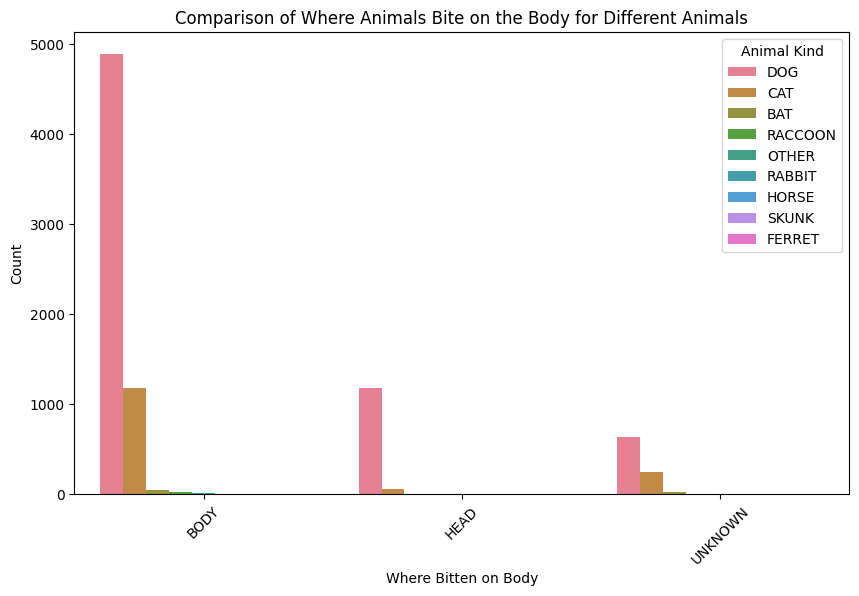

In [12]:
# Assuming 'data' is your DataFrame with relevant columns including 'SpeciesIDDesc' and 'WhereBittenIDDesc'

# Plotting the comparison of where animals bite on the body for different animals
plt.figure(figsize=(10, 6))
sns.countplot(x='WhereBittenIDDesc', hue='SpeciesIDDesc', data=data, palette='husl')
plt.title('Comparison of Where Animals Bite on the Body for Different Animals')
plt.xlabel('Where Bitten on Body')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Animal Kind')
plt.show()

### The above plot clearly shows that dogs tend to bite on the body

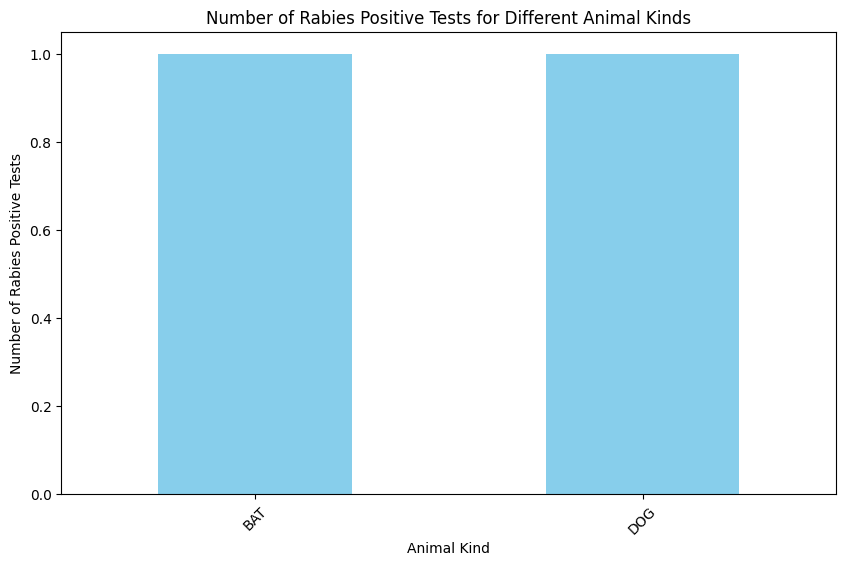

In [13]:
# Assuming 'data' is your DataFrame with relevant columns including 'SpeciesIDDesc' and 'ResultsIDDesc'
# Filter data for rabies positive tests
rabies_positive_data = data[data['ResultsIDDesc'] == 'POSITIVE']

# Count the number of rabies positive tests for each animal kind
rabies_positive_counts = rabies_positive_data['SpeciesIDDesc'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
rabies_positive_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Rabies Positive Tests for Different Animal Kinds')
plt.xlabel('Animal Kind')
plt.ylabel('Number of Rabies Positive Tests')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

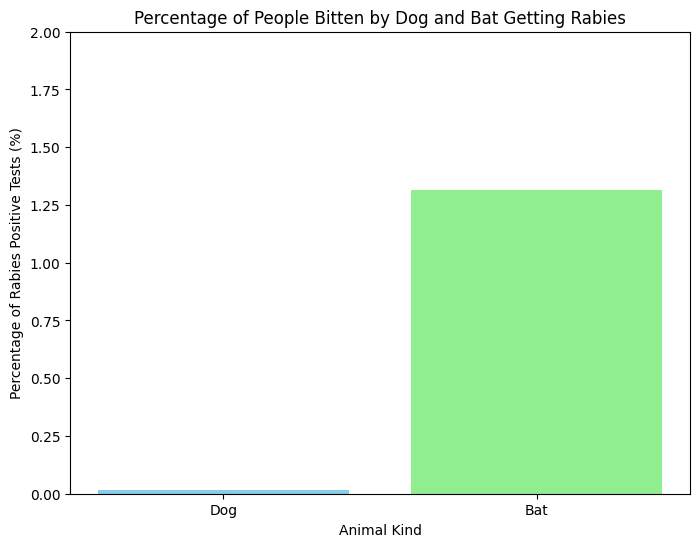

In [14]:
# Filter data for rabies positive tests
rabies_positive_data = data[data['ResultsIDDesc'] == 'POSITIVE']

# Count the number of rabies positive tests for each animal kind
rabies_positive_counts = rabies_positive_data['SpeciesIDDesc'].value_counts()

# Calculate the total number of people bitten by dogs and bats
total_dog_bites = data[data['SpeciesIDDesc'] == 'DOG'].shape[0]
total_bat_bites = data[data['SpeciesIDDesc'] == 'BAT'].shape[0]

# Calculate the percentage of people bitten by dogs and bats getting rabies
percentage_dog_rabies = (rabies_positive_counts.get('DOG', 0) / total_dog_bites) * 100
percentage_bat_rabies = (rabies_positive_counts.get('BAT', 0) / total_bat_bites) * 100

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Dog', 'Bat'], [percentage_dog_rabies, percentage_bat_rabies], color=['skyblue', 'lightgreen'])
plt.title('Percentage of People Bitten by Dog and Bat Getting Rabies')
plt.xlabel('Animal Kind')
plt.ylabel('Percentage of Rabies Positive Tests (%)')
plt.ylim(0, 2)  # Set y-axis limit to ensure the scale starts from 0
plt.show()

### The above plot is interesting. It shows that even though dogs tend to bite more, however the chance of a person getting rabies from a dog bite is < 0.1% while the chances are 1.5% with a bat bite. 